In [1]:
import os
os.environ["TQDM_DISABLE"] = "1"

import tqdm
from tqdm import tqdm as tqdm_class

_original_init = tqdm_class.__init__
def _patched_init(self, *args, **kwargs):
    kwargs["disable"] = True
    _original_init(self, *args, **kwargs)
tqdm_class.__init__ = _patched_init
tqdm.tqdm = tqdm_class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
import sys
import time
import logging
logging.getLogger("anomalib").setLevel(logging.ERROR)
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:
    import google.colab
    from google.colab import drive
    !uv pip install anomalib
    !uv pip install open-clip-torch
    drive.mount('/content/drive', force_remount=True)
    PROJECT_ROOT = Path('/content/drive/Othercomputers/Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}")

Using Python 3.12.12 environment at: /usr
Resolved 94 packages in 1.29s
Prepared 12 packages in 588ms
Installed 12 packages in 21ms
 + anomalib==2.2.0
 + freia==0.2
 + imagecodecs==2026.1.14
 + jsonargparse==4.46.0
 + kornia==0.8.2
 + kornia-rs==0.1.10
 + lightning==2.6.1
 + lightning-utilities==0.15.2
 + pytorch-lightning==2.6.1
 + rich-argparse==1.7.2
 + torchmetrics==1.8.2
 + typeshed-client==2.8.2
Using Python 3.12.12 environment at: /usr
Resolved 49 packages in 97ms
Prepared 2 packages in 34ms
Installed 2 packages in 5ms
 + ftfy==6.3.1
 + open-clip-torch==3.2.0
Mounted at /content/drive
Current working directory: /content/drive/Othercomputers/Mac/multiModal_anomaly_report


### Check config

In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
RUNTIME_CONFIG_ROOT = CONFIG_ROOT / "anomaly.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# output path
OUTPUT_ROOT = PROJECT_ROOT / "output"

# check (선택사항)
print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Root: {DATA_ROOT}")
print(f"Config Root: {RUNTIME_CONFIG_ROOT}")

Project Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report
Data Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/dataset/MMAD
Config Root: /content/drive/Othercomputers/Mac/multiModal_anomaly_report/configs/anomaly.yaml


In [4]:
from src.utils import load_config

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# TODO: runtime_config.yaml 확장/수정
config = load_config(RUNTIME_CONFIG_ROOT)
config

{'data': {'root': 'dataset/MMAD',
  'output_root': './output',
  'image_size': [224, 224],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': 2},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 6,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'accelerator': 'auto',
  'enable_progress_bar': False,
  'lo

### Train

In [5]:
from scripts.train_anomalib import Anomalibs

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
runner.fit_all()

Device: NVIDIA A100-SXM4-80GB
[patchcore] device: cuda, accelerator: auto

[1/10] Training: GoodsAD/cigarette_box...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [1/10] GoodsAD/cigarette_box done (156.9s)

[2/10] Training: GoodsAD/drink_bottle...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [2/10] GoodsAD/drink_bottle done (474.9s)

[3/10] Training: GoodsAD/drink_can...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [3/10] GoodsAD/drink_can done (152.2s)

[4/10] Training: GoodsAD/food_bottle...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [4/10] GoodsAD/food_bottle done (606.9s)

[5/10] Training: GoodsAD/food_box...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [5/10] GoodsAD/food_box done (217.1s)

[6/10] Training: GoodsAD/food_package...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [6/10] GoodsAD/food_package done (281.2s)

[7/10] Training: MVTec-LOCO/breakfast_box...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [7/10] MVTec-LOCO/breakfast_box done (213.0s)

[8/10] Training: MVTec-LOCO/juice_bottle...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [8/10] MVTec-LOCO/juice_bottle done (245.1s)

[9/10] Training: MVTec-LOCO/pushpins...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [9/10] MVTec-LOCO/pushpins done (220.7s)

[10/10] Training: MVTec-LOCO/screw_bag...


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

[Epoch 1/1]
✓ [10/10] MVTec-LOCO/screw_bag done (236.0s)


### Predict

In [5]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
# [attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]
metrics_224 = compute_anomaly_metrics(predictions)
metrics_224

Device: Tesla T4
[patchcore] device: cuda, accelerator: auto

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (139.0s, inference: 129.6s)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (225.3s, inference: 220.6s)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (88.1s, inference: 84.1s)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (173.6s, inference: 170.3s)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (113.5s, inference: 110.6s)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (131.0s, inference: 128.0s)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (96.3s, inference: 92.8s)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (116.4s, inference: 113.8s)

[9/10] Predicting: MVTec-LOCO/pushpins...
✓ [9/10] MVTec-LOCO/pushpins done (95.1s, in

KeyboardInterrupt: 

In [ ]:
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score
)
from scipy.ndimage import label as connected_components


def compute_pro(gt_masks_np, anomaly_maps_np, num_thresholds=50):
    """Per-Region Overlap (PRO) 계산.

    각 GT connected component별로 overlap을 계산하고,
    FPR에 대해 적분하여 정규화한 값을 반환.
    """
    # threshold 범위 설정
    thresholds = np.linspace(anomaly_maps_np.max(), anomaly_maps_np.min(), num_thresholds)

    pro_values = []
    fpr_values = []

    for thresh in thresholds:
        pred_binary = (anomaly_maps_np >= thresh).astype(int)

        # FPR 계산 (전체 정상 픽셀 중 잘못 예측한 비율)
        gt_neg = (gt_masks_np == 0)
        fp = np.sum(pred_binary[gt_neg])
        fpr = fp / max(np.sum(gt_neg), 1)

        # Per-Region Overlap 계산
        region_overlaps = []
        for i in range(len(gt_masks_np)):
            labeled, num_regions = connected_components(gt_masks_np[i])
            for region_id in range(1, num_regions + 1):
                region_mask = (labeled == region_id)
                region_size = np.sum(region_mask)
                if region_size == 0:
                    continue
                overlap = np.sum(pred_binary[i][region_mask]) / region_size
                region_overlaps.append(overlap)

        if region_overlaps:
            pro_values.append(np.mean(region_overlaps))
            fpr_values.append(fpr)

    if len(pro_values) < 2:
        return 0.0

    # FPR 0.3 이하 구간만 사용 (논문 기준)
    fpr_limit = 0.3
    filtered = [(f, p) for f, p in zip(fpr_values, pro_values) if f <= fpr_limit]
    if len(filtered) < 2:
        return 0.0

    fpr_filtered, pro_filtered = zip(*sorted(filtered))
    pro_auc = np.trapz(pro_filtered, fpr_filtered) / fpr_limit
    return pro_auc


results = []
for category, batches in predictions.items():
    y_true = np.concatenate([b.gt_label.cpu().numpy() for b in batches])
    y_score = np.concatenate([b.pred_score.cpu().numpy() for b in batches])
    y_pred = (y_score >= 0.5).astype(int)

    metrics = {
        "Category": category,
        "Image_AUROC": round(roc_auc_score(y_true, y_score), 4),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 4),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_true, y_pred, zero_division=0), 4),
        "N_samples": len(y_true)
    }

    # Pixel-level
    if batches[0].gt_mask is not None:
        gt_masks = torch.cat([b.gt_mask for b in batches])
        anomaly_maps = torch.cat([b.anomaly_map for b in batches])

        gt_masks_np = gt_masks.cpu().numpy().astype(int)
        anomaly_maps_np = anomaly_maps.cpu().numpy().astype(float)

        # Pixel AUROC
        gt_flat = gt_masks_np.flatten()
        pred_flat = anomaly_maps_np.flatten()
        if len(np.unique(gt_flat)) > 1:
            metrics["Pixel_AUROC"] = round(roc_auc_score(gt_flat, pred_flat), 4)
        else:
            metrics["Pixel_AUROC"] = float("nan")

        # PRO
        metrics["PRO"] = round(compute_pro(
            gt_masks_np.squeeze(1) if gt_masks_np.ndim == 4 else gt_masks_np,
            anomaly_maps_np.squeeze(1) if anomaly_maps_np.ndim == 4 else anomaly_maps_np
        ), 4)

        # Dice / IoU
        pred_binary = (anomaly_maps > 0.5).int()
        metrics["Dice"] = round(
            f1_score(gt_masks.flatten().cpu().numpy().astype(int),
            pred_binary.flatten().cpu().numpy(), zero_division=0), 4
        )
        metrics["IoU"] = round(
            jaccard_score(gt_masks.flatten().cpu().numpy().astype(int),
            pred_binary.flatten().cpu().numpy(), average="binary", zero_division=0), 4
        )

    results.append(metrics)

metrics_df = pd.DataFrame(results).set_index("Category")
avg_row = metrics_df.drop(columns=["N_samples"]).mean().round(4)
avg_row["N_samples"] = metrics_df["N_samples"].sum()
metrics_df.loc["Average"] = avg_row
col_order = [c for c in metrics_df.columns if c != "N_samples"] + ["N_samples"]
metrics_df = metrics_df[col_order]

metrics_df

Image_AUROC  Precision  Recall      F1  \
Category                                                                 
GoodsAD/cigarette_box                0.9900     0.9644  0.9919  0.9780   
GoodsAD/drink_bottle                 0.8333     0.8263  0.7388  0.7801   
GoodsAD/drink_can                    0.9171     0.9274  0.7877  0.8519   
GoodsAD/food_bottle                  0.9042     0.8556  0.8532  0.8544   
GoodsAD/food_box                     0.7758     0.7483  0.8884  0.8124   
GoodsAD/food_package                 0.7438     0.5821  0.8783  0.7002   
MVTec-LOCO/breakfast_box             0.8841     0.8961  0.7977  0.8440   
MVTec-LOCO/juice_bottle              0.9525     0.9638  0.9025  0.9322   
MVTec-LOCO/pushpins                  0.7981     0.6667  0.9186  0.7726   
MVTec-LOCO/screw_bag                 0.7080     0.6441  1.0000  0.7835   
MVTec-LOCO/splicing_connectors       0.8345     0.8238  0.8238  0.8238   
Average                              0.8492     0.8090  0.8710  0.8303   

                                Pixel_AUROC     PRO    Dice     IoU  N_samples  
Category                                                                        
GoodsAD/cigarette_box                0.9872  0.9167  0.6919  0.5289      429.0  
GoodsAD/drink_bottle                 0.9921  0.7991  0.6299  0.4597      781.0  
GoodsAD/drink_can                    0.9588  0.6680  0.5841  0.4125      293.0  
GoodsAD/food_bottle                  0.9884  0.6776  0.5988  0.4273      604.0  
GoodsAD/food_box                     0.9724  0.5091  0.3402  0.2049      397.0  
GoodsAD/food_package                 0.9753  0.7671  0.4296  0.2735      483.0  
MVTec-LOCO/breakfast_box             0.9144  0.7570  0.5888  0.4173      275.0  
MVTec-LOCO/juice_bottle              0.9181  0.6864  0.5949  0.4234      330.0  
MVTec-LOCO/pushpins                  0.6535  0.3581  0.0774  0.0403      310.0  
MVTec-LOCO/screw_bag                 0.7436  0.5550  0.1405  0.0755      341.0  
MVTec-LOCO/splicing_connectors       0.6842  0.5159  0.2313  0.1307      312.0  
Average                              0.8898  0.6555  0.4461  0.3085     4555.0

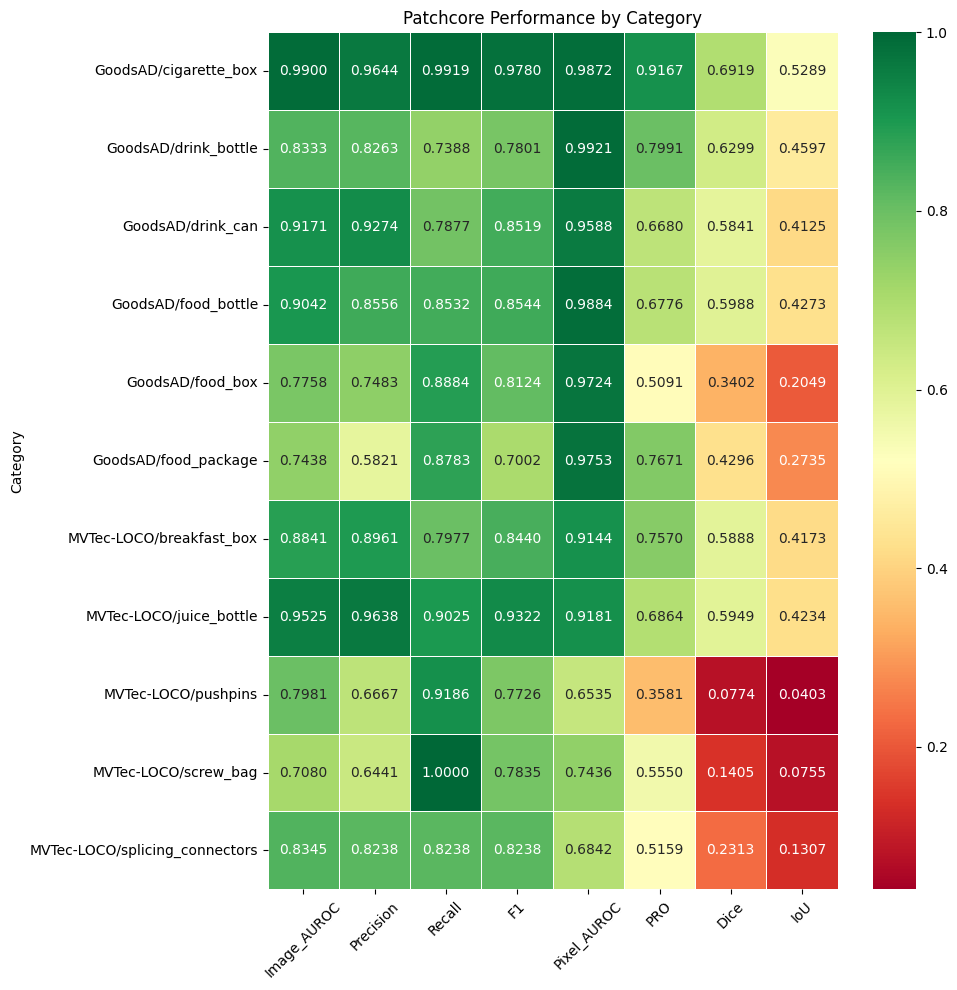

<Axes: title={'center': 'Patchcore Performance by Category'}, ylabel='Category'>

In [ ]:
from src.visual.plot import heatmap_plot

metrics_trans = metrics_df.drop('Average').drop(columns='N_samples')
heatmap_plot(
    metrics_trans,
    figsize=(10, 10),
    cmap='RdYlGn',
    annot=True,
    fmt='.4f',
    linewidths=0.5,
    title='Patchcore Performance by Category',
    rotation_x=45,
    rotation_y=0
)

Device: mps
Anomalibs initialized - model: patchcore, device: mps
Categories: 11 | Filter: anomaly | Samples: 1

GoodsAD / cigarette_box
  anomaly: 246 images → Selected: 1
  Inference: 79.4ms/image


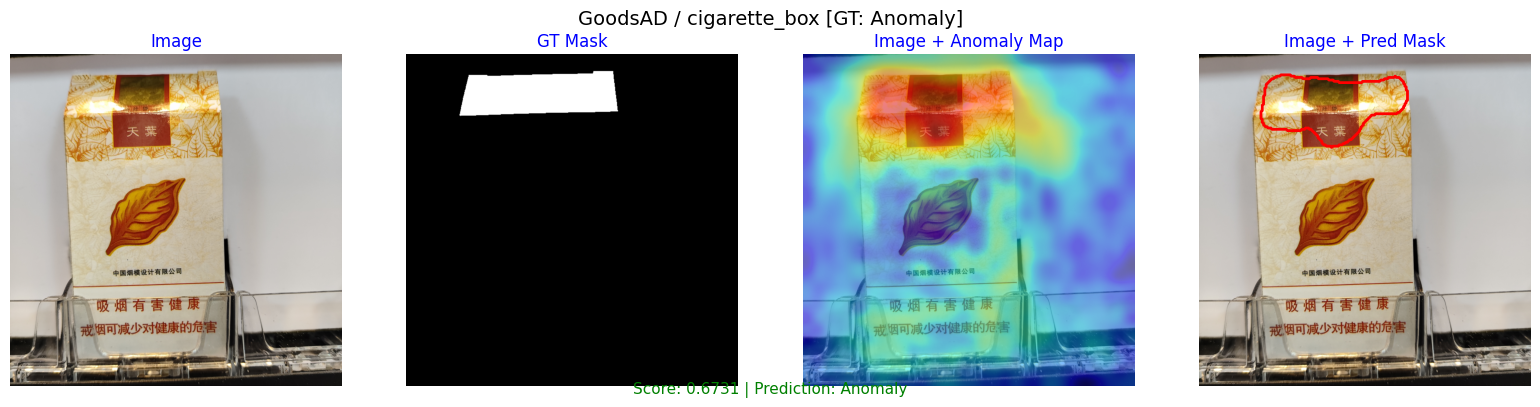


GoodsAD / drink_bottle
  anomaly: 425 images → Selected: 1
  Inference: 428.3ms/image


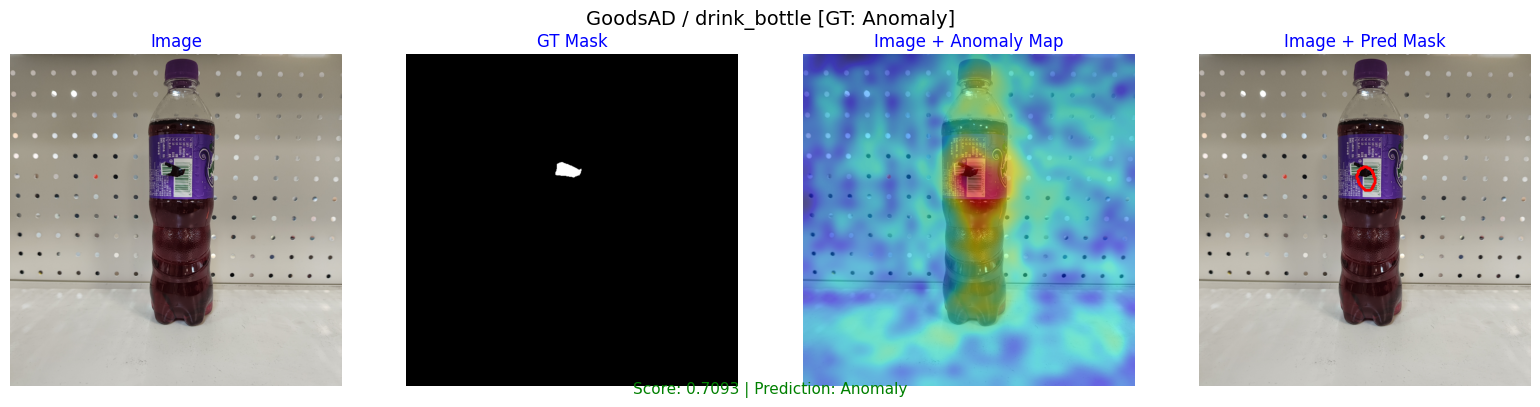


GoodsAD / drink_can
  anomaly: 146 images → Selected: 1
  Inference: 94.9ms/image


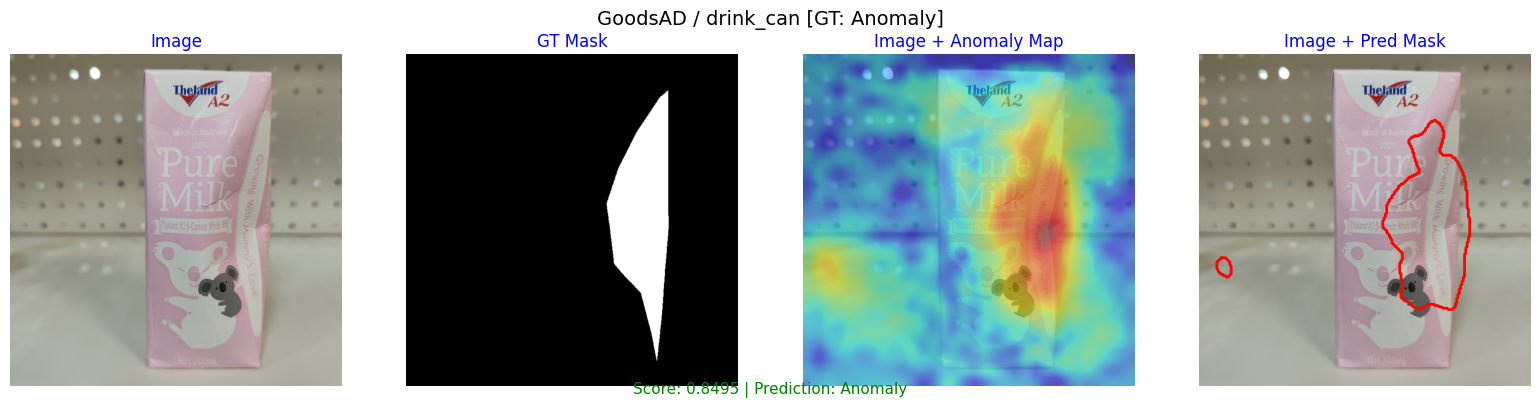


GoodsAD / food_bottle
  anomaly: 361 images → Selected: 1
  Inference: 737.4ms/image


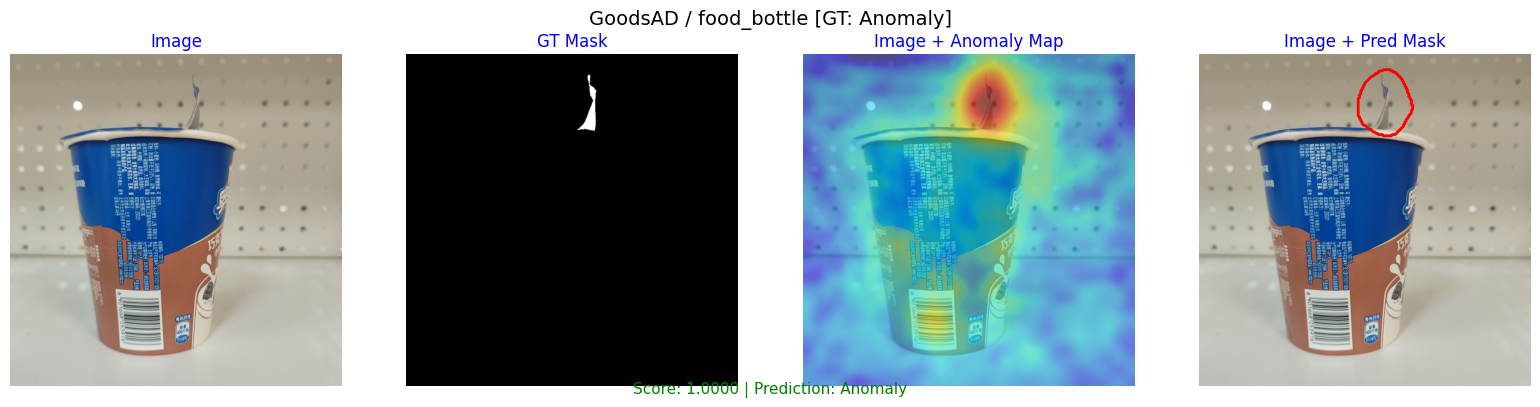


GoodsAD / food_box
  anomaly: 251 images → Selected: 1
  Inference: 498.4ms/image


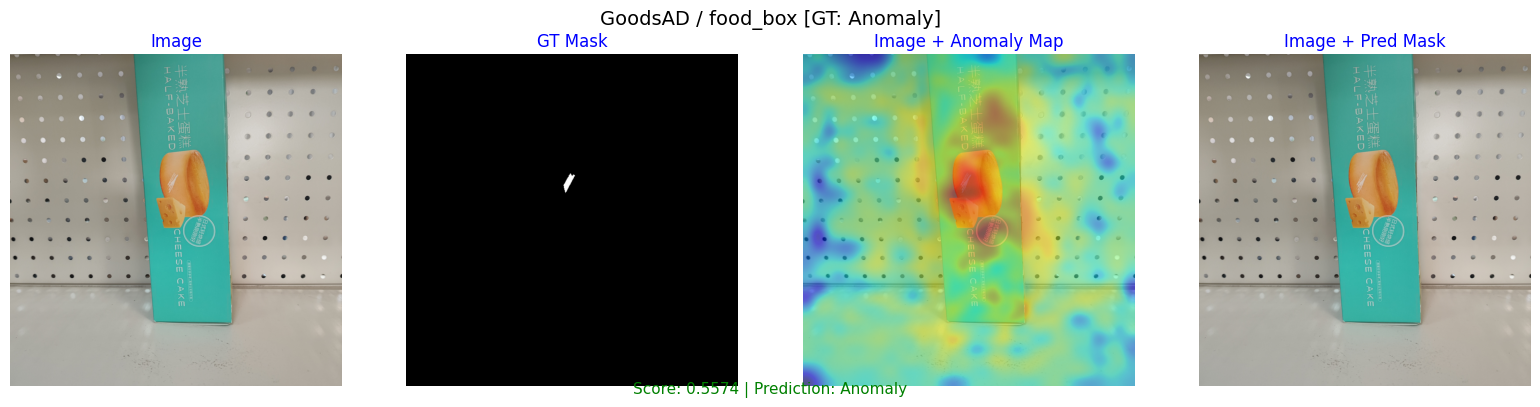


GoodsAD / food_package
  anomaly: 230 images → Selected: 1
  Inference: 205.3ms/image


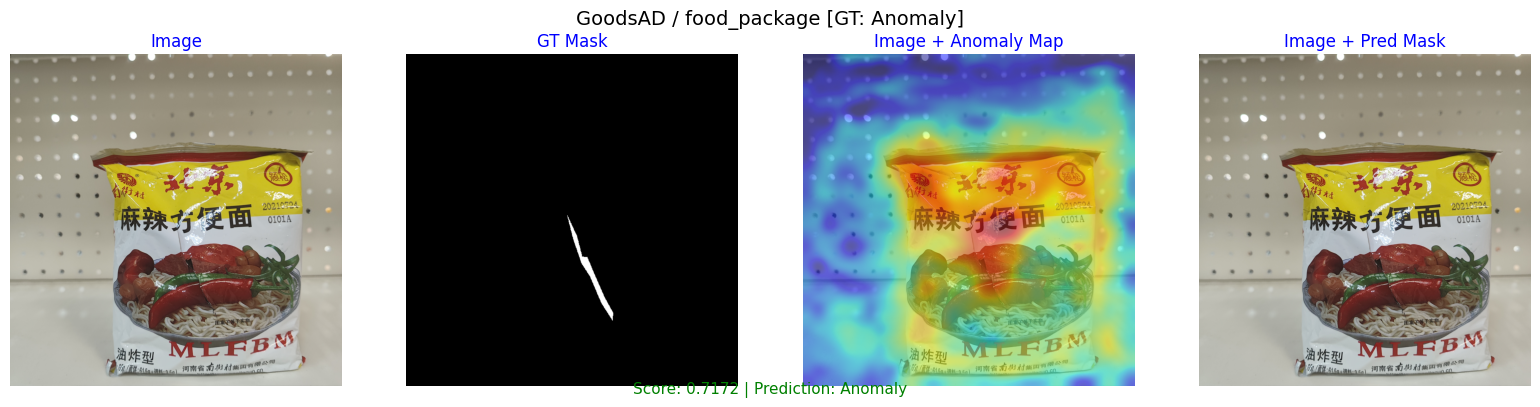


MVTec-LOCO / breakfast_box
  anomaly: 173 images → Selected: 1
  Inference: 291.7ms/image


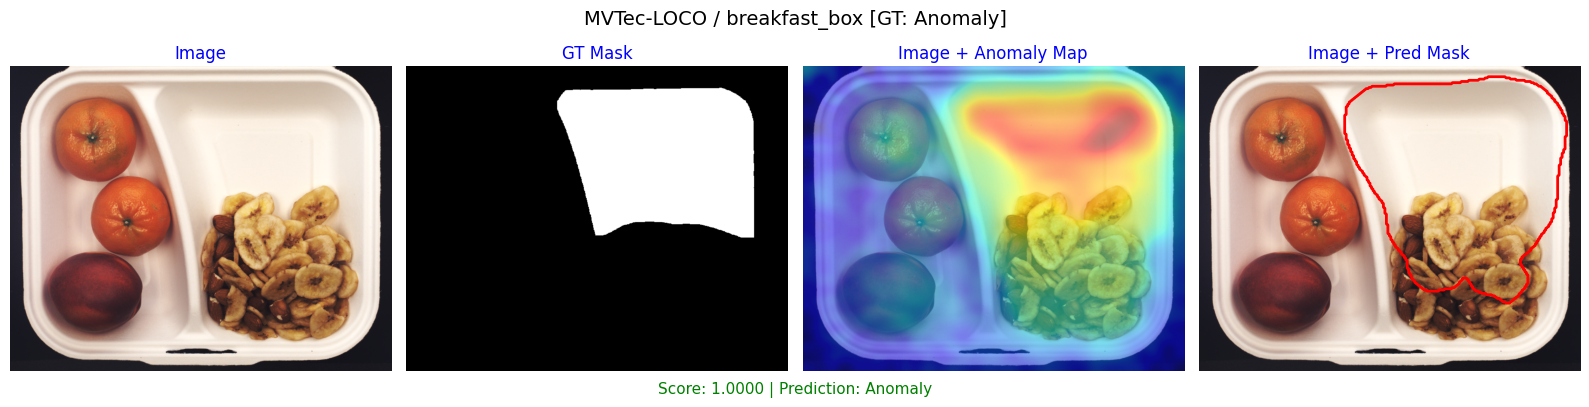


MVTec-LOCO / juice_bottle
  anomaly: 236 images → Selected: 1
  Inference: 300.6ms/image


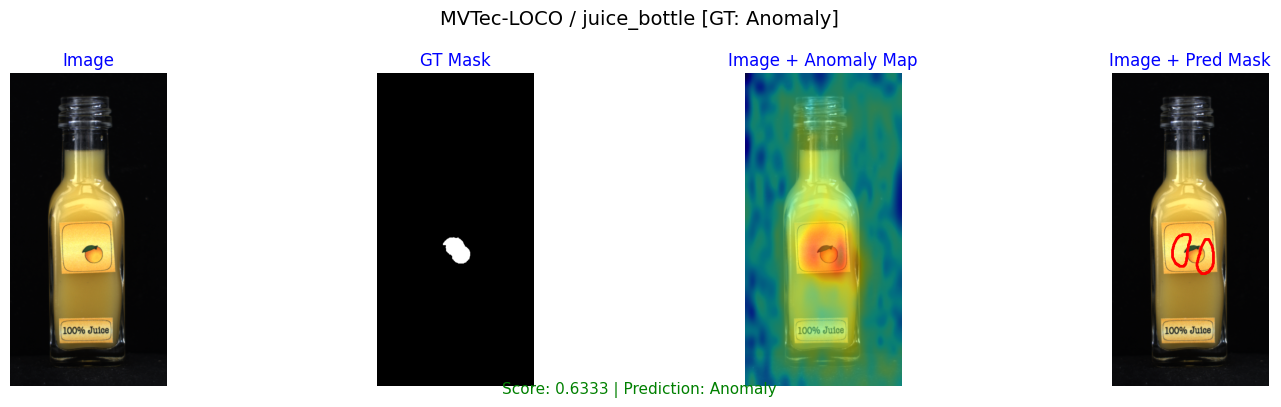


MVTec-LOCO / pushpins
  anomaly: 172 images → Selected: 1
  Inference: 134.1ms/image


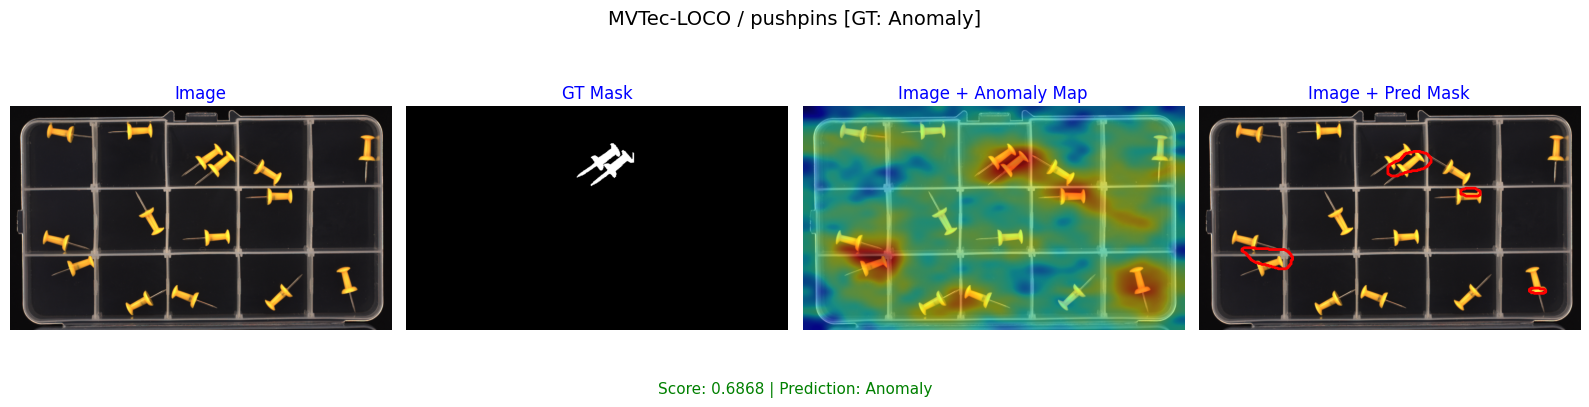


MVTec-LOCO / screw_bag
  anomaly: 219 images → Selected: 1
  Inference: 142.4ms/image


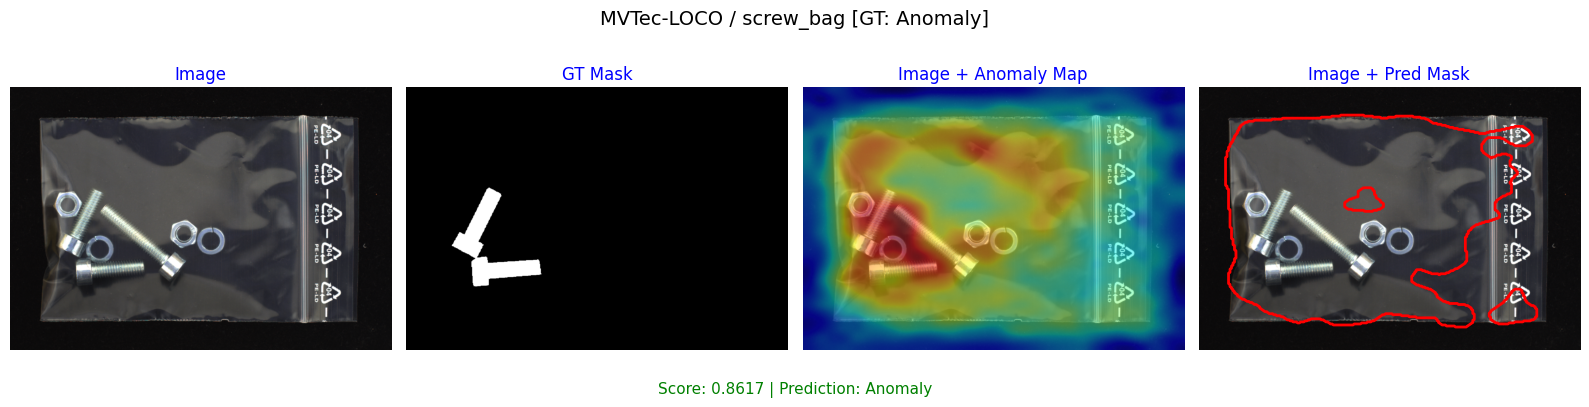


MVTec-LOCO / splicing_connectors
  anomaly: 193 images → Selected: 1
  Inference: 252.2ms/image


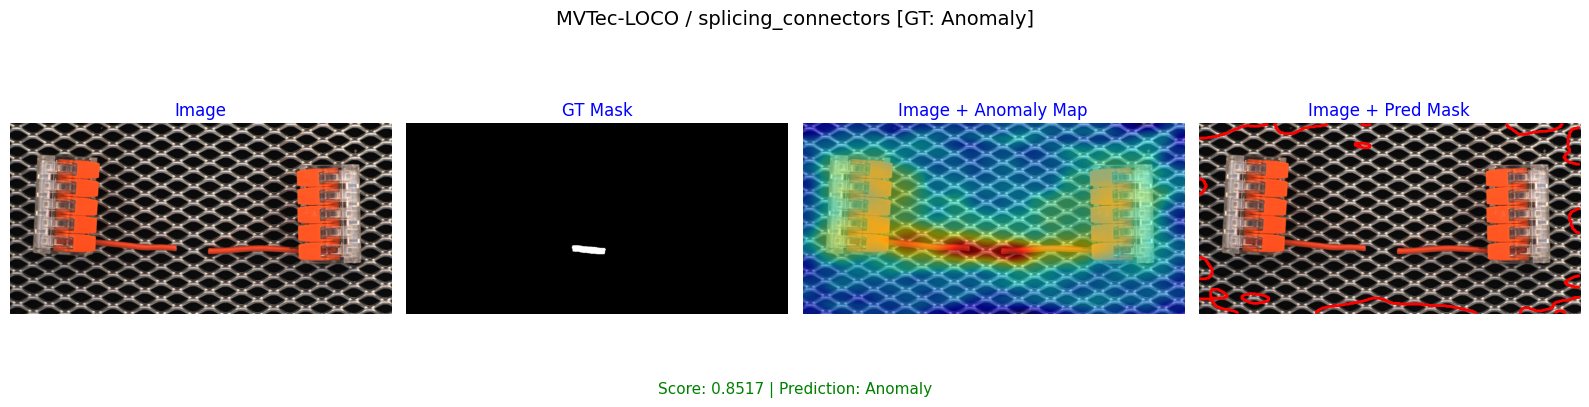

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.visual.plot import visualize_predictions_from_runner

runner = Anomalibs()
results = visualize_predictions_from_runner(
    runner,
    n_samples_per_category=1,
    filter_by="anomaly",      # "all", "anomaly", "normal"
    random_sample=True,       # 랜덤 샘플링
    show_inference_time=True,
)

### Latency (CPU)

### Image size 224 version

In [ ]:
config

{'data': {'root': '/Users/mungughyeon/Documents/Bootcamp/Likelion/backup/datasets/MMAD',
  'output_root': './output',
  'image_size': [224, 224],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': 0},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 0,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'acce

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
# [attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]
img_224_metrics = compute_anomaly_metrics(predictions)
img_224_metrics

Device: mps
[patchcore] device: mps, accelerator: cpu

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (79.2s)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (232.8s)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (53.0s)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (208.0s)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (88.8s)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (117.0s)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (51.3s)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (46.5s)

[9/10] Predicting: MVTec-LOCO/pushpins...
✓ [9/10] MVTec-LOCO/pushpins done (51.2s)

[10/10] Predicting: MVTec-LOCO/screw_bag...
✓ [10/10] MVTec-LOCO/screw_bag done (55.0s)


In [ ]:
import re

log_path = "logs/inference_anomalib_20260209_165007.log"

with open(log_path) as f:
    text = f.read()

# "[1/10] GoodsAD/cigarette_box done (79.2s)" 패턴 매칭
pattern = r"\[(\d+)/(\d+)\]\s+(\S+)/(\S+)\s+done\s+\(([\d.]+)s\)"
matches = re.findall(pattern, text)

img_224 = pd.DataFrame(matches, columns=["idx", "total", "dataset", "category", "time_sec"])
img_224["time_sec"] = img_224["time_sec"].astype(float)
img_224["version"] = "224x224"
img_224 = img_224.drop(columns=["idx", "total"])
img_224

dataset       category  time_sec  version
0     GoodsAD  cigarette_box      79.2  224x224
1     GoodsAD   drink_bottle     232.8  224x224
2     GoodsAD      drink_can      53.0  224x224
3     GoodsAD    food_bottle     208.0  224x224
4     GoodsAD       food_box      88.8  224x224
5     GoodsAD   food_package     117.0  224x224
6  MVTec-LOCO  breakfast_box      51.3  224x224
7  MVTec-LOCO   juice_bottle      46.5  224x224
8  MVTec-LOCO       pushpins      51.2  224x224
9  MVTec-LOCO      screw_bag      55.0  224x224

### Image size 700 version

In [ ]:
config['predict']

{'version': 1}

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
# [attr for attr in dir(list(predictions.values())[0][0]) if not attr.startswith('_')]
img_700_metrics = compute_anomaly_metrics(predictions)
img_700_metrics

Device: mps
[patchcore] device: mps, accelerator: cpu

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (115.6s)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (314.3s)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (78.1s)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (271.6s)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (120.8s)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (165.7s)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (69.7s)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (59.9s)

[9/10] Predicting: MVTec-LOCO/pushpins...
✓ [9/10] MVTec-LOCO/pushpins done (63.9s)

[10/10] Predicting: MVTec-LOCO/screw_bag...
✓ [10/10] MVTec-LOCO/screw_bag done (69.5s)


Image_AUROC  Precision  Recall      F1  \
Category                                                           
GoodsAD/cigarette_box          0.9900     0.9643  0.9878  0.9759   
GoodsAD/drink_bottle           0.8333     0.8263  0.7388  0.7801   
GoodsAD/drink_can              0.9171     0.9274  0.7877  0.8519   
GoodsAD/food_bottle            0.9042     0.8556  0.8532  0.8544   
GoodsAD/food_box               0.7758     0.7483  0.8884  0.8124   
GoodsAD/food_package           0.7438     0.5833  0.8826  0.7024   
MVTec-LOCO/breakfast_box       0.8841     0.8968  0.8035  0.8476   
MVTec-LOCO/juice_bottle        0.9525     0.9638  0.9025  0.9322   
MVTec-LOCO/pushpins            0.7981     0.6667  0.9186  0.7726   
MVTec-LOCO/screw_bag           0.7080     0.6431  0.9954  0.7814   
Average                        0.8507     0.8076  0.8758  0.8311   

                          Image_Threshold  Pixel_AUROC     PRO    Dice  \
Category                                                                 
GoodsAD/cigarette_box                 0.5       0.9872  0.9117  0.6919   
GoodsAD/drink_bottle                  0.5       0.9921  0.7862  0.6299   
GoodsAD/drink_can                     0.5       0.9588  0.7643  0.5841   
GoodsAD/food_bottle                   0.5       0.9884  0.8142  0.5988   
GoodsAD/food_box                      0.5       0.9724  0.6867  0.3402   
GoodsAD/food_package                  0.5       0.9753  0.7608  0.4296   
MVTec-LOCO/breakfast_box              0.5       0.9144  0.7610  0.5888   
MVTec-LOCO/juice_bottle               0.5       0.9181  0.8739  0.5949   
MVTec-LOCO/pushpins                   0.5       0.6535  0.6018  0.0774   
MVTec-LOCO/screw_bag                  0.5       0.7436  0.5793  0.1405   
Average                               0.5       0.9104  0.7540  0.4676   

                             IoU  Pixel_Threshold  N_samples  
Category                                                      
GoodsAD/cigarette_box     0.5289              0.5      429.0  
GoodsAD/drink_bottle      0.4597              0.5      781.0  
GoodsAD/drink_can         0.4125              0.5      293.0  
GoodsAD/food_bottle       0.4273              0.5      604.0  
GoodsAD/food_box          0.2049              0.5      397.0  
GoodsAD/food_package      0.2735              0.5      483.0  
MVTec-LOCO/breakfast_box  0.4173              0.5      275.0  
MVTec-LOCO/juice_bottle   0.4234              0.5      330.0  
MVTec-LOCO/pushpins       0.0403              0.5      310.0  
MVTec-LOCO/screw_bag      0.0755              0.5      341.0  
Average                   0.3263              0.5     4243.0

In [ ]:
import re

log_path = "logs/inference_anomalib_20260209_175357.log"

with open(log_path) as f:
    text = f.read()

# "[1/10] GoodsAD/cigarette_box done (79.2s)" 패턴 매칭
pattern = r"\[(\d+)/(\d+)\]\s+(\S+)/(\S+)\s+done\s+\(([\d.]+)s\)"
matches = re.findall(pattern, text)

img_700 = pd.DataFrame(matches, columns=["idx", "total", "dataset", "category", "time_sec"])
img_700["time_sec"] = img_700["time_sec"].astype(float)
img_700["version"] = "700x700"
img_700 = img_700.drop(columns=["idx", "total"])
img_700

dataset       category  time_sec  version
0     GoodsAD  cigarette_box     115.6  700x700
1     GoodsAD   drink_bottle     314.3  700x700
2     GoodsAD      drink_can      78.1  700x700
3     GoodsAD    food_bottle     271.6  700x700
4     GoodsAD       food_box     120.8  700x700
5     GoodsAD   food_package     165.7  700x700
6  MVTec-LOCO  breakfast_box      69.7  700x700
7  MVTec-LOCO   juice_bottle      59.9  700x700
8  MVTec-LOCO       pushpins      63.9  700x700
9  MVTec-LOCO      screw_bag      69.5  700x700

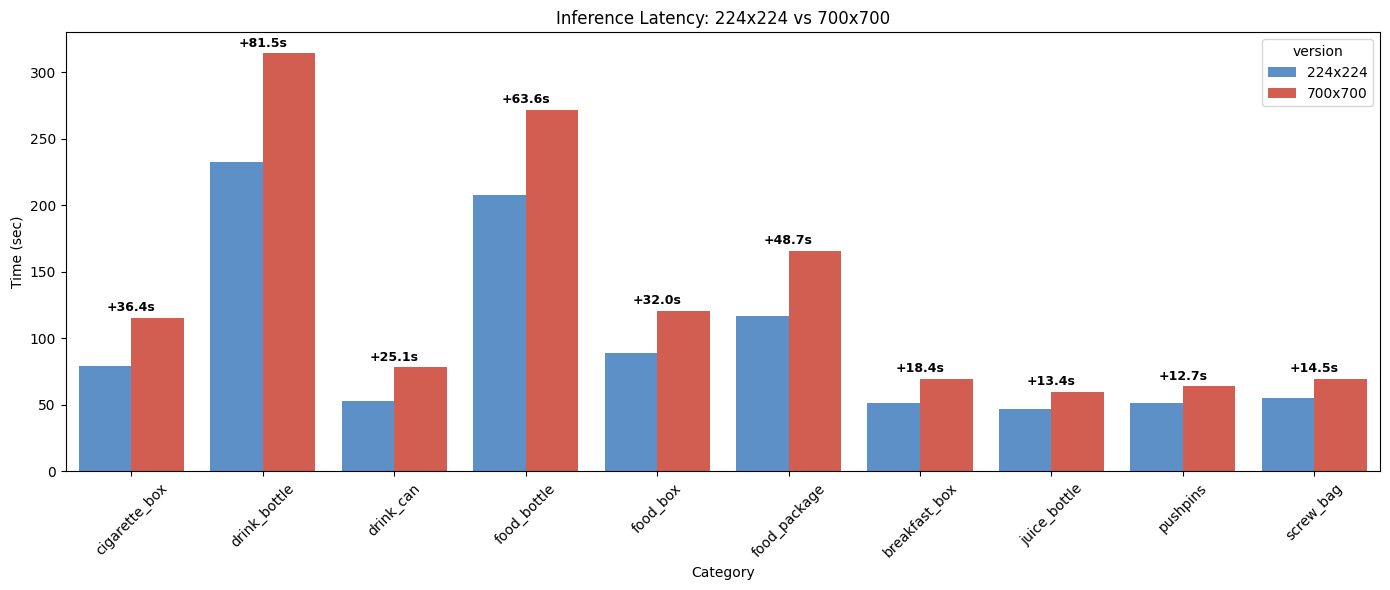

dataset       category  time_sec  version
0      GoodsAD  cigarette_box      79.2  224x224
1      GoodsAD   drink_bottle     232.8  224x224
2      GoodsAD      drink_can      53.0  224x224
3      GoodsAD    food_bottle     208.0  224x224
4      GoodsAD       food_box      88.8  224x224
5      GoodsAD   food_package     117.0  224x224
6   MVTec-LOCO  breakfast_box      51.3  224x224
7   MVTec-LOCO   juice_bottle      46.5  224x224
8   MVTec-LOCO       pushpins      51.2  224x224
9   MVTec-LOCO      screw_bag      55.0  224x224
10     GoodsAD  cigarette_box     115.6  700x700
11     GoodsAD   drink_bottle     314.3  700x700
12     GoodsAD      drink_can      78.1  700x700
13     GoodsAD    food_bottle     271.6  700x700
14     GoodsAD       food_box     120.8  700x700
15     GoodsAD   food_package     165.7  700x700
16  MVTec-LOCO  breakfast_box      69.7  700x700
17  MVTec-LOCO   juice_bottle      59.9  700x700
18  MVTec-LOCO       pushpins      63.9  700x700
19  MVTec-LOCO      screw_bag      69.5  700x700

In [ ]:
from src.visual.plot import bar_plot

latency_df = pd.concat([img_224, img_700], ignore_index=True)

ax = bar_plot(
    latency_df,
    x_col="category",
    y_col="time_sec",
    hue="version",
    palette=["#4A90D9", "#E74C3C"],
    rotation=45,
    title="Inference Latency: 224x224 vs 700x700",
    xlabel="Category",
    ylabel="Time (sec)",
    figsize=(14, 6),
    show=False,
)

categories = latency_df["category"].unique()
for i, cat in enumerate(categories):
    t224 = latency_df[(latency_df["category"] == cat) & (latency_df["version"] == "224x224")]["time_sec"].values[0]
    t700 = latency_df[(latency_df["category"] == cat) & (latency_df["version"] == "700x700")]["time_sec"].values[0]
    diff = t700 - t224
    ax.text(i, max(t224, t700) + 5, f"+{diff:.1f}s", ha="center", fontsize=9, color="black",
fontweight="bold")

plt.tight_layout()
plt.show()

latency_df

### Metric

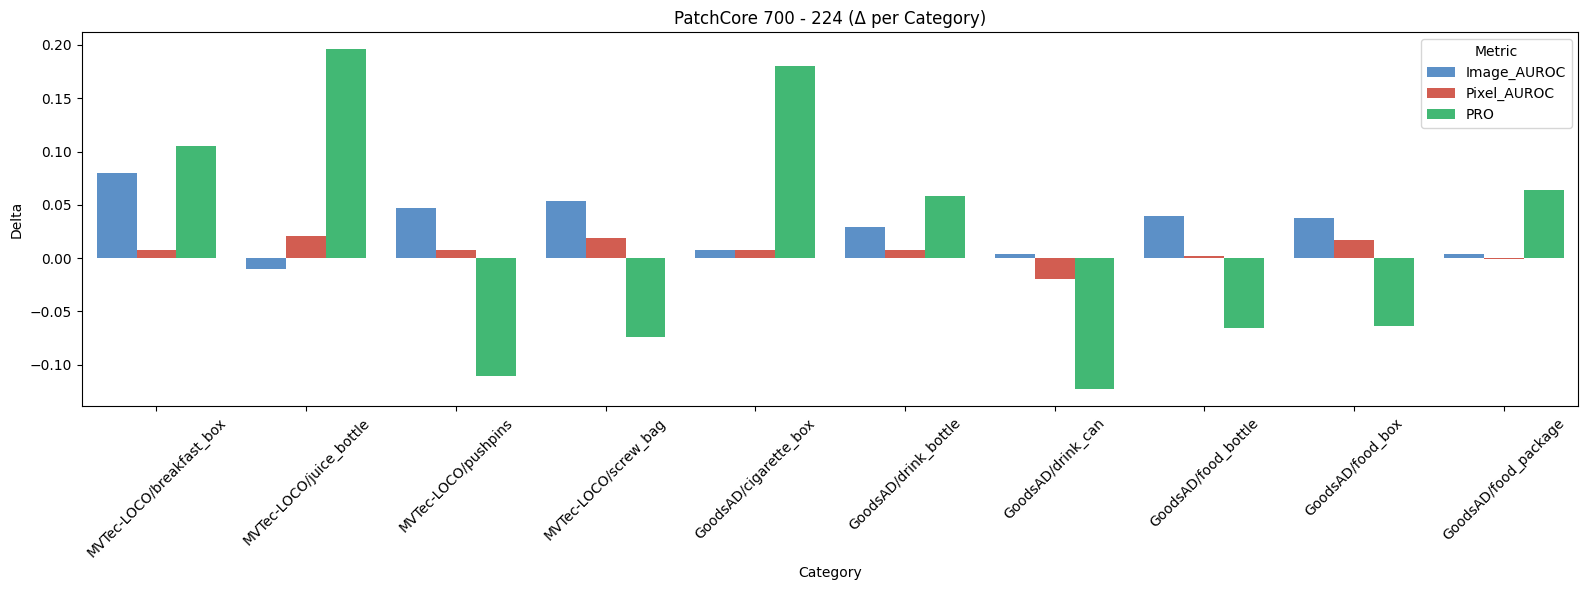

<Axes: title={'center': 'PatchCore 700 - 224 (Δ per Category)'}, xlabel='Category', ylabel='Delta'>

In [ ]:
from src.visual.plot import bar_plot

df_delta = df_700.set_index("Category")[["Image_AUROC", "Pixel_AUROC", "PRO"]] - df_224.set_index("Category")[["Image_AUROC", "Pixel_AUROC", "PRO"]]
df_delta = df_delta.reset_index()
df_delta_melted = df_delta.melt(id_vars="Category", var_name="Metric", value_name="Delta")

bar_plot(
    df_delta_melted,
    x_col="Category",
    y_col="Delta",
    hue="Metric",
    palette=["#4A90D9", "#E74C3C", "#2ECC71"],
    rotation=45,
    title="PatchCore 700 - 224 (Δ per Category)",
    xlabel="Category",
    ylabel="Delta",
    figsize=(16, 6),
)

### latency (GPU: T4)

In [ ]:
from src.utils import load_config, load_json, load_csv

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"

# load config (img size: 224,244)
config = load_config(RUNTIME_CONFIG_ROOT)
config

{'data': {'root': 'dataset/MMAD',
  'output_root': './output',
  'image_size': [224, 224],
  'datasets': ['GoodsAD', 'MVTec-LOCO'],
  'categories': ['breakfast_box',
   'juice_bottle',
   'pushpins',
   'screw_bag',
   'cigarette_box',
   'drink_bottle',
   'drink_can',
   'food_bottle',
   'food_box',
   'food_package']},
 'anomaly': {'model': 'patchcore',
  'patchcore': {'backbone': None,
   'layers': None,
   'coreset_sampling_ratio': None,
   'visualizer': False},
  'winclip': {'class_name': None, 'k_shot': None, 'scales': None},
  'efficientad': {'model_size': None,
   'teacher_out_channels': None,
   'visualizer': False,
   'evaluator': True,
   'imagenet_dir': 'imagenette/train'}},
 'predict': {'version': 0},
 'training': {'resume': False,
  'train_batch_size': None,
  'eval_batch_size': None,
  'num_workers': 0,
  'max_epochs': None,
  'early_stopping': {'enabled': True, 'patience': 10, 'min_epochs': 10}},
 'engine': {'accelerator': 'auto',
  'enable_progress_bar': False,
  'lo

In [ ]:
from scripts.train_anomalib import Anomalibs
from src.eval.metrics import compute_anomaly_metrics

runner = Anomalibs() # default path: RUNTIME_CONFIG_ROOT
predictions = runner.predict_all()
img_224_metrics = compute_anomaly_metrics(predictions)
img_224_metrics

Device: Tesla T4
[patchcore] device: cuda, accelerator: auto

[1/10] Predicting: GoodsAD/cigarette_box...
✓ [1/10] GoodsAD/cigarette_box done (318.9s, inference: 16.1s)

[2/10] Predicting: GoodsAD/drink_bottle...
✓ [2/10] GoodsAD/drink_bottle done (1216.2s, inference: 71.9s)

[3/10] Predicting: GoodsAD/drink_can...
✓ [3/10] GoodsAD/drink_can done (426.4s, inference: 12.4s)

[4/10] Predicting: GoodsAD/food_bottle...
✓ [4/10] GoodsAD/food_bottle done (929.3s, inference: 64.0s)

[5/10] Predicting: GoodsAD/food_box...
✓ [5/10] GoodsAD/food_box done (605.7s, inference: 25.5s)

[6/10] Predicting: GoodsAD/food_package...
✓ [6/10] GoodsAD/food_package done (718.7s, inference: 37.1s)

[7/10] Predicting: MVTec-LOCO/breakfast_box...
✓ [7/10] MVTec-LOCO/breakfast_box done (386.2s, inference: 15.1s)

[8/10] Predicting: MVTec-LOCO/juice_bottle...
✓ [8/10] MVTec-LOCO/juice_bottle done (504.0s, inference: 17.8s)

[9/10] Predicting: MVTec-LOCO/pushpins...


KeyboardInterrupt: 

In [ ]:
# update img size (700,700)
config['data']['image_size'] = [700, 700]
config['predict']['version'] = 1
config[['data', 'predict']] # check